In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris['data']
print(iris.feature_names)
print(X.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


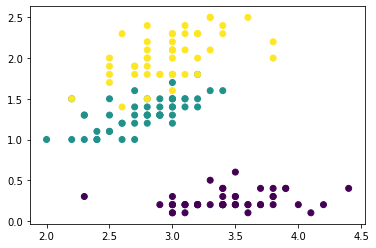

In [4]:
plt.scatter(X[:,1], X[:,3], c = iris.target)
plt.show()
# We will try to predict this pattern using KMeans clustering

In [5]:
# delete 0 and 2 columns from X
X = np.delete(X, [0,2],1) 

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters=3)

In [8]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
labels = model.predict(X)

In [10]:
# return the centroids learned
centroids = model.cluster_centers_
print(centroids.shape)

(3, 2)


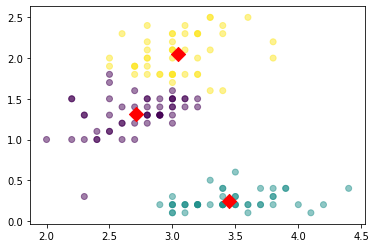

In [11]:
# alpha = [0,1] transparent to opaque
plt.scatter(X[:,0],X[:,1], c= labels, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], marker= 'D', s=100, c= 'r')
plt.show()

### Checking the Quality of Clustering 
1. Good Clustering 
    - Low inertia: Tight Clusters 
        - Inertia is measure of how much the points are spread out from the cluster centroid
        - Lower Inertia means, clusters are tightly bunched.
        - Attribute:  `model.inertia_`
        - Model training tries to minimize this inertia.
    - Less No. of Clusters
        - Inertia decreases with increasing no. of clusters
        - But Good Model is having `Low Inertia and Less no. of Clusters`

2. Measure the quality of clustering 
    - If we have labels for our points (which is not always in Unsupervised learning)
        - Then make a cross tabulation and see if points are clustered correctly
    - Inertia Value (lower the better)
    - Use `Elbow` method, to select right inertia and no. of clusters
        - Draw plot between 'inertia vs no_of_clusters'
        - Choose the k(no_of_clusters) from where Inertia decreases very slowly i.e a shape of elbow is made

In [12]:
# Quality of Clustering 

In [13]:
target = iris.target
print(iris.target_names)
# print(target)

['setosa' 'versicolor' 'virginica']


In [14]:
species = np.array([iris.target_names[i] for i in target])

In [15]:
# Cross Tabulation
temp = pd.DataFrame({'labels': labels, 'species': species})
pd.crosstab(temp['labels'], temp['species'])

species,setosa,versicolor,virginica
labels,,,
0,1,46,6
1,49,0,0
2,0,4,44


In [16]:
# Inertia Value
model.inertia_

20.60239595366448

In [17]:
k_values = range(1, 10)
inertia_values = []

In [18]:
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertia_values.append(model.inertia_)

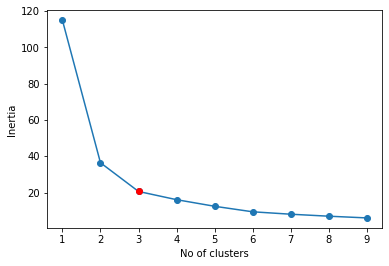

In [19]:
# Elbow Method
plt.plot(k_values, inertia_values, '-o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.plot([3], inertia_values[2],c='r', marker= 'o')
plt.show()
# After K=3, value of inertia decreases slowly and no. of clusters increases
# So K= 3 is good choice for no. of clusters

### Affect of Feature Variance on KMeans
 If features have large difference in their Variance(features on different scales)
 then Clustering will not be good 

In [20]:
wines = datasets.load_wine()

In [21]:
# print(wines.DESCR)
X = wines.data 
y = wines.target 
print(X.shape, y.shape)
print(X[:4,:])
print(y[:5])

(178, 13) (178,)
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]]
[0 0 0 0 0]


In [22]:
wines_df = pd.DataFrame(data=X, columns=wines.feature_names)
wines_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [23]:
from sklearn.pipeline import make_pipeline, Pipeline

In [24]:
def cross_tab_wines(scaler, model):
    pipeline = make_pipeline(scaler, model)
    pipeline.fit(X)
    y_predict = pipeline.predict(X)
    labels = [wines.target_names[i] for i in y_predict]
    species = [wines.target_names[i] for i in y]
    df = pd.DataFrame({'labels': labels, 'species': species})
    ct = pd.crosstab(df['labels'], df['species'])
#     score = pipeline.score(X)   # score here is negative of inertia
    score = model.inertia_  # We can use objects inside pipeline separately.
    return ct, score

In [25]:
model = KMeans(n_clusters=3)

In [26]:
# Without Scaling
ct1, score = cross_tab_wines(None, model)
print(ct1)
print('Score:', score)
# Clustering is very bad as we can see 

species  class_0  class_1  class_2
labels                            
class_0       13       20       29
class_1       46        1        0
class_2        0       50       19
Score: 2370689.686782968


In [27]:
# Reason of bad clustering is high variance in Features
wines_df.describe()
# Check out the std of features below
# Features are on different scales which impacts the performance of model,
# model becomes biased to feature having large values
# Scaling is needed 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


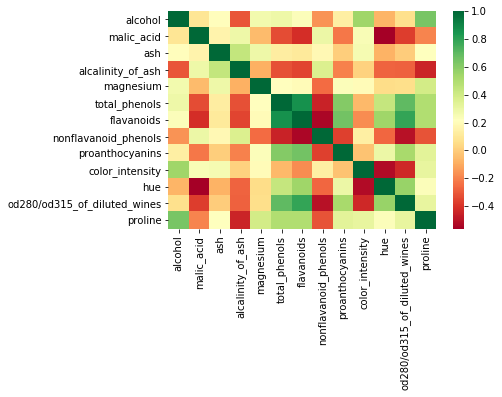

In [28]:
sns.heatmap(wines_df.corr(), cmap='RdYlGn')

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Using Scaling 
ct2, score = cross_tab_wines(StandardScaler(), model )
print(ct2)
print('Score:', score)
# Better Clustering after Scaling 

species  class_0  class_1  class_2
labels                            
class_0       59        3        0
class_1        0        3       48
class_2        0       65        0
Score: 1277.928488844642


### Normalizer
1. Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one.
2. Each row i.e each sample is rescaled independent of other rows.
3. Used when One row has higher values than other

#### Norm: 
1. Length of vector (distance from origin)
2. L1: ||v|| : Manhattan Distance
3. L2: sqrt(v1^2 + v2^2 + v3^2 + ...): Euclidian Distance
4. L-max = max(|v1| + |v2| + ...)

See its documentation
#### Doubts:
1. Need clarity on this when we use Normalizer and when Scaler
2. If we don't use Normalizer then how exactly it affects optimization and model.

In [31]:
from sklearn.preprocessing import Normalizer

In [32]:
data = np.array([[1, 2, 3], [2, 20, 200], [2, 200, 2000]])
data

array([[   1,    2,    3],
       [   2,   20,  200],
       [   2,  200, 2000]])

In [33]:
normData = Normalizer().transform(data)
print(normData)
# Norm of each row is now = 1
np.linalg.norm(normData, axis=1)

[[2.67261242e-01 5.34522484e-01 8.01783726e-01]
 [9.94987935e-03 9.94987935e-02 9.94987935e-01]
 [9.95036698e-04 9.95036698e-02 9.95036698e-01]]


array([1., 1., 1.])

In [34]:
ob = Normalizer()
ob.fit(data) # fit() method do nothing here, it is just added so that it can be included in pipeline and 
# pipeline .fit() method works without any error.
ob.transform(data)

array([[2.67261242e-01, 5.34522484e-01, 8.01783726e-01],
       [9.94987935e-03, 9.94987935e-02, 9.94987935e-01],
       [9.95036698e-04, 9.95036698e-02, 9.95036698e-01]])

In [35]:
# Stock DataSet 
# daily stock price movements (i.e. the dollar difference between the closing and 
# opening prices for each trading day). 
# You are given a NumPy array 'movements' of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance),
# where each row corresponds to a company, and each column corresponds to a trading day.

In [36]:
stocks = pd.read_csv("./datasets/company-stock-movements-2010-2015-incl.csv")

In [37]:
stocks.head()
stocks.shape

(60, 964)

In [38]:
company_names = stocks.iloc[:,0]
company_names[:5]

0               Apple
1                 AIG
2              Amazon
3    American express
4              Boeing
Name: Unnamed: 0, dtype: object

In [39]:
movements = stocks.iloc[:,1:]
print(movements.shape)
movements[:5]

(60, 963)


,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [40]:
def show_max_min(arr):
    temp = np.array(np.amax(arr, axis=1))
    temp =temp.reshape((-1,1))
    print(temp.shape)
    print(np.hstack((temp, np.array(np.amin(arr, axis=1)).reshape(-1,1))))

In [41]:
show_max_min(movements)
# From max and min for each row, we can see that values of each row has significant difference.
# That's why normalization is required
# But where exactly this cause problem in our model if we don't use Normalizer

(60, 1)
[[ 30.760009 -30.119995]
 [  5.34      -4.810001]
 [ 14.630005 -15.160003]
 [  2.519996  -2.809997]
 [  3.09      -4.989998]
 [  1.03      -1.199999]
 [  3.790001  -3.040001]
 [  3.169999  -2.299999]
 [  4.270004  -4.849999]
 [  3.220001  -3.900001]
 [  2.549985  -4.500005]
 [  0.99      -1.120001]
 [  3.919998  -4.029999]
 [  2.54      -2.6     ]
 [  1.4       -0.88    ]
 [  1.01      -1.520001]
 [  0.770001  -0.870001]
 [ 34.830004 -60.540047]
 [  7.830002 -22.919998]
 [  1.830001  -1.34    ]
 [  2.240005  -2.75    ]
 [  2.039997  -1.150002]
 [  1.830002  -4.120002]
 [  6.470002  -5.740005]
 [  1.009998  -0.86    ]
 [  3.259999  -2.090004]
 [  3.029999  -2.5     ]
 [  2.74      -4.330003]
 [  2.470001  -2.279999]
 [  4.890007  -3.599991]
 [ 30.849991 -26.509991]
 [  2.660003  -2.490006]
 [  2.529999  -2.990006]
 [  1.139999  -1.72    ]
 [  0.27      -0.25    ]
 [  4.440001  -4.84    ]
 [  3.059998  -2.73    ]
 [  2.450001  -2.27    ]
 [  2.960003  -2.260002]
 [  0.86      -1.

In [42]:
norm_movements = Normalizer().transform(movements)
show_max_min(norm_movements)

(60, 1)
[[ 0.16019127 -0.15685822]
 [ 0.21688602 -0.19535992]
 [ 0.13752081 -0.14250275]
 [ 0.11944349 -0.13318904]
 [ 0.10506685 -0.169671  ]
 [ 0.14829743 -0.17277356]
 [ 0.18428509 -0.14781707]
 [ 0.28169498 -0.20438435]
 [ 0.1112979  -0.1264155 ]
 [ 0.14045701 -0.17011873]
 [ 0.11705167 -0.20656321]
 [ 0.13070164 -0.14786462]
 [ 0.13007605 -0.13372618]
 [ 0.14853373 -0.15204241]
 [ 0.22034342 -0.13850158]
 [ 0.14821114 -0.22305058]
 [ 0.11281053 -0.12746123]
 [ 0.1522852  -0.26469573]
 [ 0.11496176 -0.3365163 ]
 [ 0.19004191 -0.13915629]
 [ 0.1315969  -0.16155834]
 [ 0.21877501 -0.12332945]
 [ 0.12252493 -0.2758483 ]
 [ 0.13839318 -0.12277856]
 [ 0.12160304 -0.10354339]
 [ 0.21490201 -0.1377749 ]
 [ 0.1575566  -0.12999724]
 [ 0.14672328 -0.23186578]
 [ 0.17202783 -0.15879479]
 [ 0.17958142 -0.13220666]
 [ 0.18594697 -0.15978781]
 [ 0.13464527 -0.12604029]
 [ 0.09688926 -0.11450577]
 [ 0.11582212 -0.17474931]
 [ 0.17194662 -0.15920983]
 [ 0.14760292 -0.16090045]
 [ 0.14162712 -0.126

In [43]:
from numpy.linalg import norm

In [44]:
norm(norm_movements, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

### What is the use of Normalizer()? When and why we need this ?

In [45]:
def clustering_pipeline(samples, labels=None, species=None, clusters = 10, normalizer=None):
    model = KMeans(n_clusters= clusters)
    pipeline = make_pipeline(normalizer, model)
    pipeline.fit(samples)
    predict_labels = pipeline.predict(samples)
    df = pd.DataFrame({'predicted-labels': predict_labels, 'company': species })
#     print('Score: ', pipeline.score(samples))
    return df, model.inertia_

In [46]:
# Results after normalization

df, inertia = clustering_pipeline(movements, species=company_names, clusters=10, normalizer=Normalizer())
print(inertia)
df.sort_values('predicted-labels')

25.517855365552027


,predicted-labels,company
59,0,Yahoo
13,0,DuPont de Nemours
35,0,Navistar
8,0,Caterpillar
44,1,Schlumberger
53,1,Valero Energy
10,1,ConocoPhillips
12,1,Chevron
57,1,Exxon
28,1,Coca Cola


In [47]:
inertia_values = []
k_clusters = list(range(1,20))
for k in k_clusters:
    tmpDf, myinertia = clustering_pipeline(movements, company_names, clusters=k, normalizer=Normalizer())
    inertia_values.append(myinertia)

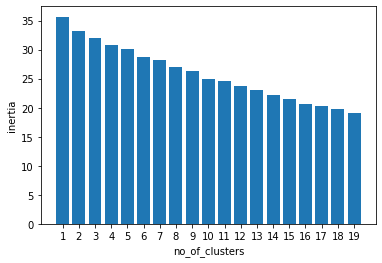

In [48]:
plt.bar(k_clusters, inertia_values)
plt.xlabel('no_of_clusters')
plt.ylabel('inertia')
plt.xticks(k_clusters)
plt.show()
# Elbow technique don't work here 

In [49]:
from sklearn.manifold import TSNE
def tSNE_visualization(samples, labels, species, learning_rate=100, annotate=False):
    model = TSNE(learning_rate=100)
    tsne_features = model.fit_transform(samples)
    if annotate is True:
        plt.figure(figsize=(10,7))
    plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
#     To annotate the points
    if annotate is True:
        for x,y,category in zip(tsne_features[:,0], tsne_features[:,1], species):
            plt.annotate(category,(x,y), c='r', fontsize=10)
    plt.show()

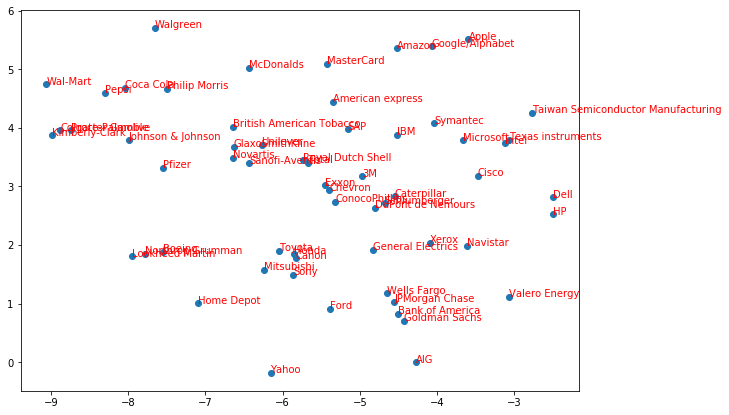

In [50]:
tSNE_visualization(norm_movements, None, company_names, annotate=True)

### Unsupervised learning for Visualization

1. Hierarchical Clustering
    - At starting each data point is a single cluster,then clusters which are closer to each other are merged and       so on.
        - `Agglomerative Clustering`: forming bigger clusters from smaller ones.
        
    - Clusters are contained in one another.
    
                    ANIMALS
                    /     \
                MAMMALS   REPTILES
                /    \     /     \ 
            HUMAN   APES  SNAKES  LIZARDS
    
    - 'human, apes, snakes, lizards' are separate clusters, then mammals is a cluster that contains human and apes
       then 'animals' is bigger cluster which contains clusters 'mammals' and 'reptiles'.
    - 

2. tSNE

### Agglomerative Hierarchical Clustering
1. Visualized using Dendrograms 
    - Each cluster is represented by vertical lines 
    - Cluster merger is shown by join of these vertical lines 
    - Clusters which are closed to each other are joined first then others.
    - y-axis shows the Distance, two vertical lines joining at some distance 'd' means 'd' is the distance 
      between these two clusters.
2. Code Part 
    - `from scipy.cluster.hierarchy import dendrogram, linkage`
    - `mergings = linkage(samples, method= 'complete')`
        - Linkage actually performs the unsupervised clustering
        - method = 'complete'/ 'simple' 
            - complete: Distance(cluster-A,cluster-B)= distance between farthest points in clusters.
            - simple: Distance(cluster-A, cluster-B) = distance between closest points in clusters.
    - `dendrogram(mergings, labels= country_names_list, leaf_font_size=6, leaf_rotation=90)`
        - Used to visualize the clustering result.
        - Labels correspond to the names of starting data points or clusters of size 1
    - plt.show()

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [52]:
def show_dendrogram(samples, mylabels, mymethod='complete', fsize=None):
    if fsize is not None:
        plt.figure(figsize= fsize)
    mergings = linkage(samples, method=mymethod)
    dendrogram(mergings, labels= mylabels, leaf_font_size=10, leaf_rotation=90)
    plt.show()

In [53]:
def extract_bunch(bunch):
    samples = bunch.data
    labels = bunch.target
    species = np.array([bunch.target_names[i] for i in labels])
    print(samples.shape, labels.shape, species.shape)
    return samples, labels, species

(178, 13) (178,) (178,)


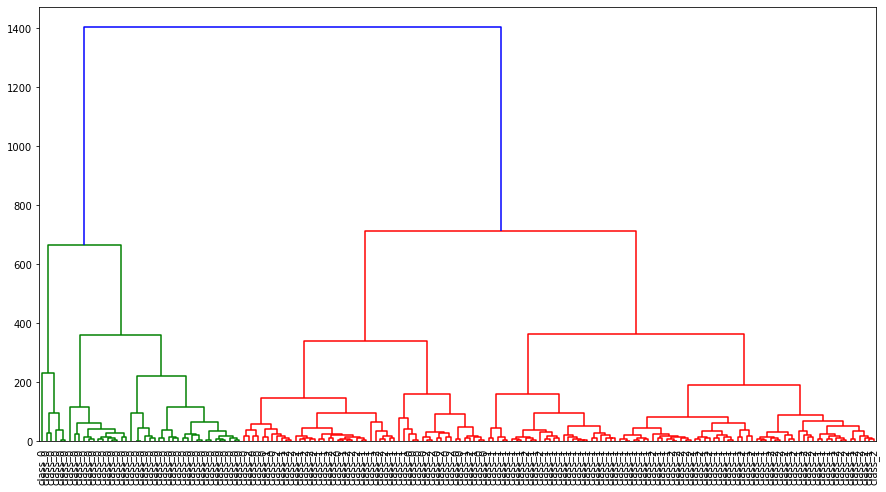

In [54]:
samples, labels, species = extract_bunch(wines)
show_dendrogram(samples, species, fsize=(15,8))

(60, 963) (60,)


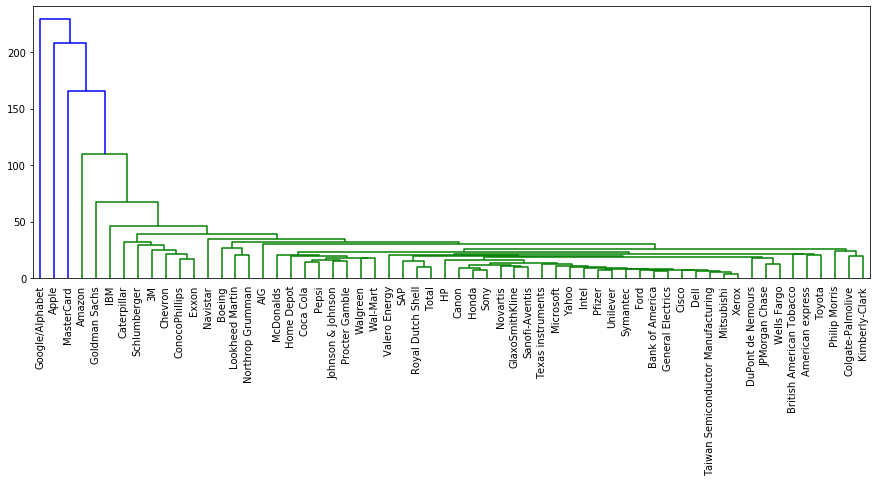

In [55]:
# Stock Movements clustering 
# Without Normalizer
print(movements.shape, company_names.shape)
show_dendrogram(movements, list(company_names), fsize=(15, 5))

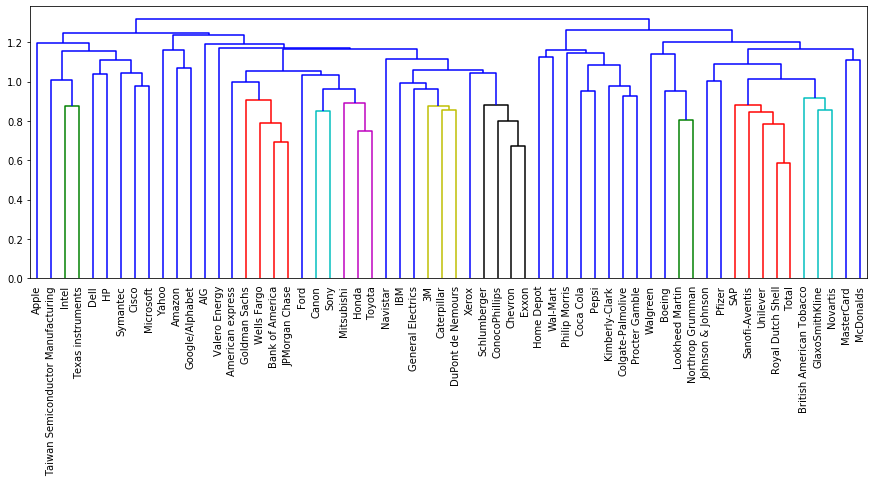

In [56]:
# With Normalizer 
from sklearn.preprocessing import normalize
# show_dendrogram(Normalizer().transform(movements), list(company_names), fsize=(15,5))
show_dendrogram(normalize(movements), list(company_names), fsize=(15,5))

### Intermediate stage in Hierarchical Clustering 

1. Intermediate clustering is done by **specifying height on dendorgram**
    - Height on dendrogram = max Distance between merging clusters.
    - Clustering will stop for clusters which have distance beyond the height specified here.
    - Distance between clusters is defined/calculated by `linkage(samples, method='complete')`. 
2. Extracting Cluster Labels from intermediate stage
    - Use `fcluster` method
    - `from scipy.cluster.hierarchy import fcluster, linkage` 
    - `mergings = linkage(samples, method='complete')`
        - This linkage will calculate distance between different clusters.
    - `labels = fcluster(mergings, 15, criterion='distance')`
        - Here clustering is done till distance =15, now all the clusters formed till now, will be labelled by numbers starting from 1, and each data point will belong to one of the clusters.
        - Return numpy array, containing cluster label for each data sample.
        - 15 is the distance/height specified by us.
    - We can use these labels for each sample to create insights such as `cross tabulation`

In [57]:
samples, labels, species = extract_bunch(wines)

(178, 13) (178,) (178,)


In [58]:
from scipy.cluster.hierarchy import fcluster

In [59]:
mergings = linkage(samples, method='complete')
predicted_labels = fcluster(mergings, 700, criterion='distance')
# this threshold value of distance, using hit and trial

In [60]:
df = pd.DataFrame({'labels': predicted_labels, 'variety': species })
ct = pd.crosstab(df['labels'], df['variety'])
ct

variety,class_0,class_1,class_2
labels,,,
1,43,0,0
2,16,15,21
3,0,56,27


### Visualizing High Dimensional Data, using t-SNE
1. Code Part
    - from sklearn.manifold import TSNE
    - `model = TSNE(learning_rate=100)`
        - For Learning Rate mostly try values between 50 to 200
        - A wrong value of learning rate give you all data bunched together in result. 
    - `model.fit_transform(data)`
        - Has only one method. 
        - Fits and transforms simultaneously, each time start over again.
        - It is not like you can `.fit()` over some train data and then can `.transform()` the 'test data'

2. It reduces a High Dimensional data to 2-D data for visualization
    - Axis of 2-D data has no specific interpretation.
    - tSNE features change everytime we run this `model.fit_transform()` method.
    - 2-D plot also change every time but relative position of points remain same.

In [61]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [62]:
# Use tSNE
from sklearn.manifold import TSNE

In [63]:
def tSNE_visualization(samples, labels, species, learning_rate=100, annotate=False):
    model = TSNE(learning_rate=100)
    tsne_features = model.fit_transform(samples)
    if annotate is True:
        plt.figure(figsize=(10,7))
    plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
#     To annotate the points
    if annotate is True:
        for x,y,category in zip(tsne_features[:,0], tsne_features[:,1], species):
            plt.annotate(category,(x,y), c='r', fontsize=10)
    plt.show()

(150, 4) (150,) (150,)


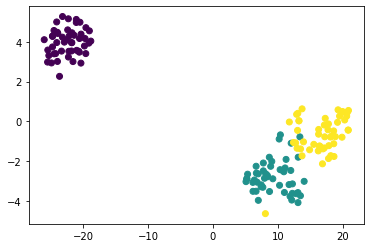

In [64]:
samples, labels, species = extract_bunch(iris)
tSNE_visualization(samples, labels, species,100)
# we can see that iris data has mainly 2 clusters and this result matches with kMeans clustering,
# see the elbow method, k=2 also has a very low inertia.
# Two species are very close, so it is difficult to group these samples in 3 clusters

(178, 13) (178,) (178,)


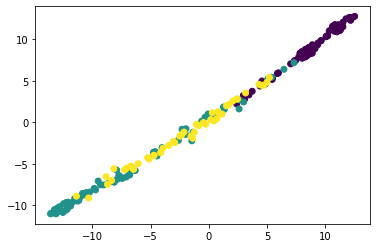

In [65]:
# Without Scaling, see how difficult is to identify clusters
samples, labels, species = extract_bunch(wines)
tSNE_visualization(samples, labels,species, learning_rate=100)

(178, 13) (178,) (178,)


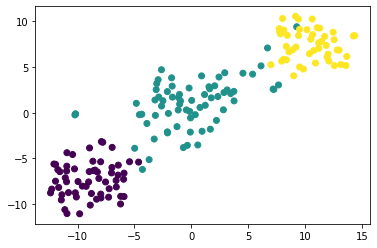

In [66]:
# After Scaling, see to identify clusters.wines
samples, labels, species = extract_bunch(wines)
samples = StandardScaler().fit_transform(samples)
tSNE_visualization(samples, labels, species, learning_rate=200)

In [67]:
datasets.fetch_species_distributions()

{'coverages': array([[[ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         ...,
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ -128,  -128,  -128, ...,  -128,  -128,  -128]],
 
        [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         ...,
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999]],
 
        [[ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         ...,
         [ -128,  -128,  -128, ...,  -128,  -128,  -128],
         [ 

### Dimension Reduction 
1. Find patterns in data and use those patterns to re-express data in compress form. 
    - More storage efficient and computation efficient
    - Main task in Dimension Reduction is to reduces features which are mainly noise or are less informative

2. PCA: Principal Component Analysis
    - Dimension Reduction Technique
    - 2 steps 
        - Decorrelation (dimension remains same)
            - Rotate the data samples to be aligned with axis
            - Shift the samples to have mean =0
            - **What is the use of Decorrelation ??**
        - Reduces Dimension
    - Code 
        - `from sklearn.decomposition import PCA`
        - `model = PCA()`
        - `model.fit(samples)`: learns the transformation from the data
            - It learns to shift and rotate data but doesn't change the data
            - Data is still same as orginal one, nothing changed.
            - It learns the **Principal Components**
        - `model.transform(samples/new_data)`: Applies the learned transformation to data
            - Here it actually shifts and rotates data
            - returns transformed samples. size(transformed_samples) = size(original_samples)
            - columns of transformed samples are **PCA features**
            - It often happens that features of data are correlated, PCA rotates the data and align to axis, due 
              to this rotation, resulting **PCA features don't have linear correlation**: `Decorrelation`. **What               is the use of this ?**
            - 
    - Principal Components 
        - PCA learns the Principal components.
        - These are unit vectors or directions.
        - Principal Components are the directions in which samples vary the most(direction of variance).
        - For each dimension of data we have a corresponding component.
        - PCA aligns the principal components with the axis( in `.transform()` method).
        - After `.fit()` method, principal components are available as `model.components_` attribute of object.
            - `model.components_` returns numpy array 
            - Each row corresponds to a Principal Component 
            - Each row defines displacement from the mean: (dx, dy)
                - It means if we start from point meanX then move in direction (meanX + displacement)
                - To draw this component two points will be Mean->(x,y) and (x+dx, y+dy)

In [68]:
samples, labels, species = extract_bunch(wines)

(178, 13) (178,) (178,)


In [69]:
wines.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [70]:
# Take 2 features from wine data: total_phenols(5) vs od280(11)
samples = samples[:,[5,11]]    # extracting 5th and 11th column
print(samples[0:5])

[[2.8  3.92]
 [2.65 3.4 ]
 [2.8  3.17]
 [3.85 3.45]
 [2.8  2.93]]


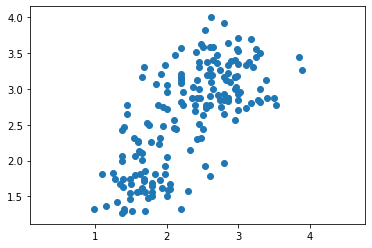

In [71]:
plt.scatter(samples[:,0], samples[:,1])
plt.axis('equal')   # what is this doing, not understood properly 
plt.show()

In [72]:
# Correlation between 2 features 
from scipy.stats import pearsonr

In [73]:
# Correlation Coefficient: range(-1,1)
# 1: strong positive correlation,  0: neutral ,  -1: strong negative correlation
cor_coef, p_value = pearsonr(samples[:,0], samples[:,1])
cor_coef

0.6999493647911862

In [74]:
from sklearn.decomposition import PCA

In [75]:
model = PCA()

In [76]:
model.fit(samples)
# Learn the principal components and learn mean and transformations 

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [77]:
mean = model.mean_
mean
# We have 2 features, two values are mean value corresponding to each feature

array([2.29511236, 2.61168539])

In [78]:
comp_displacement_arr = model.components_
pc1_disp = comp_displacement_arr[0]
pc2_disp = comp_displacement_arr[1]
comp_displacement_arr
# Principal components = no. of dimensions 
# Principal components defines the direction of variance, in which directions data is varying the most 
# Here Each row for each component and gives displacement from mean

array([[-0.64116665, -0.76740167],
       [-0.76740167,  0.64116665]])

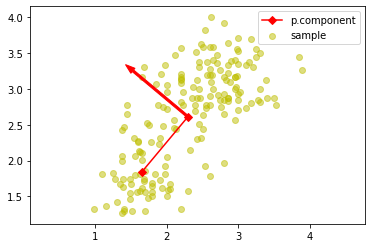

In [79]:
# Plot Features of sample and their principal components learned by pca
plt.scatter(samples[:,0], samples[:,1], c='y', alpha=0.5, label='sample')
plt.axis('equal')
# plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='black', width=0.01)
plt.arrow(mean[0], mean[1], pc2_disp[0], pc2_disp[1], color='red', width=0.03)
plt.plot([mean[0], mean[0]+ pc1_disp[0]], [ mean[1], mean[1]+ pc1_disp[1]], c='r', marker='D', label='p.component')
plt.legend()
# plt.plot([mean[0], mean[0] + pc2_disp[0]],[ mean[1], mean[1]+ pc2_disp[1]], c='r', marker='D')

In [81]:
# transformed sample
t_sample = model.transform(samples)

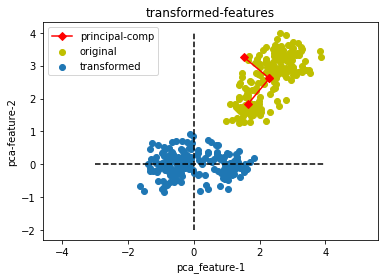

In [83]:
# Transformed sample and original samples
plt.scatter(samples[:,0], samples[:,1], c='y', label='original')
plt.plot([mean[0], mean[0]+ pc1_disp[0]], [ mean[1], mean[1]+ pc1_disp[1]], c='r', marker='D',label='principal-comp')
plt.plot([mean[0], mean[0] + pc2_disp[0]],[ mean[1], mean[1]+ pc2_disp[1]], c='r', marker='D')

plt.scatter(t_sample[:,0], t_sample[:,1], label ='transformed')

plt.plot([-3,4], [0,0], 'k--')
plt.plot([0,0], [-2,4 ], 'k--')
plt.axis('equal')
plt.title('transformed-features')
plt.xlabel('pca_feature-1')
plt.ylabel('pca-feature-2')
plt.legend()
plt.show()

In [84]:
# Pearson coef, check correlation
p_coef, p_value = pearsonr(t_sample[:,0], t_sample[:,1])
p_coef
# Close to zero 
# PCA did Decorrelation

2.7755575615628914e-16

1. **Intrinsic Dimensions**
    - Essential dimensions/ no. of features needed to approximate the dataset
    - Features which have significant information about the dataset/ not-noisy features
    - Intrinsic Dimensions give us idea about *How much dataset can be compressed*
    - Can be detected with PCA
    - `Intrinsic Dimensions = no. of PCA features with significant variance`
        - Low variance of a feature means, for all samples, value of this feature is approx same, so this feature
          won't help much in distinguishing things, so we can remove it.
    - Plot no. of features vs variance of features
        - To determine Intrinsic Dimensions 
        - But this approach can be sometimes ambigous, see `wines` dataset plot below
        

In [85]:
# consider iris dataset 
samples, labels, species = extract_bunch(iris)

(150, 4) (150,) (150,)


In [86]:
iris_model = PCA()

In [87]:
iris_model.fit(samples)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [88]:
# no. of features = no. of principal components
features = range(iris_model.n_components_)
features

range(0, 4)

In [89]:
# Variance of each PCA feature: Features are in descending order of variance
# Here this variance is not of original features, it is of PCA features
# ?? Without transform how we generate PCA features ??
# Ans: explained_variance_: The amount of variance explained by each of the selected components.
# .fit(samples) calculate the principal components, this explained_variance_ comes from these components.
feature_variance = iris_model.explained_variance_
feature_variance

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

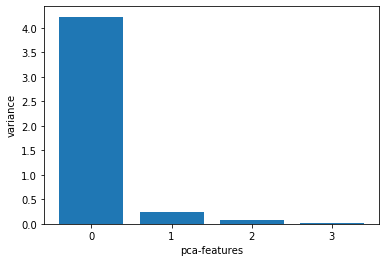

In [90]:
plt.bar(features, feature_variance)
plt.xlabel('pca-features')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
# we can see pca-features 2 and 3 have extremly low variance, so we can ignore them 
# Intrinsic dimension = 2

In [91]:
# Intrinsic dimensions of wines dataset
samples, labels, species = extract_bunch(wines)

(178, 13) (178,) (178,)


In [92]:
model = PCA()

In [93]:
scaler = StandardScaler()
samples = scaler.fit_transform(samples)

In [94]:
model.fit(samples)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

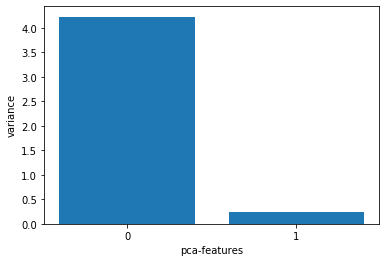

In [124]:
plt.bar(range(model.n_components_), model.explained_variance_)
plt.xlabel('pca-features')
plt.ylabel('variance')
plt.xticks(range(model.n_components_))
plt.show()
# Here choosing Intrinsic Dimension is ambigous, choosing particular value of intrinsic dimension is debatable.

**Dimension Reduction using PCA**
1. PCA
    - PCA features are in decreasing order of variance 
    - PCA performs Dimensionality Reduction by discarding low variance features assuming them noise
    - PCA keeps high variance features (they are much informative)
2. Process 
    - Choose no. of features to keep by specifying: `PCA(n_components=k)`
        - Here it says keep first 'k' PCA features
    - Good Choice for 'k' is *Intrinsic Dimension*
3. Alternative to PCA
    - PCA doesn't support sparse matrix (csr_matrix)
    - For sparse matrix
        - `from sklearn.decomposition import TruncatedSVD
        - ` model = TruncatedSVD(n_components=k)
        - ` model.fit(samples)` and `t_samples = model.transform(samples)`
    - This works in same way as PCA.    
    

In [96]:
# Dimensionality reduction on Iris DataSet 
# Above we see Intrinsic Dimension for Iris = 2
samples, labels, species = extract_bunch(iris)

(150, 4) (150,) (150,)


In [97]:
model = PCA(n_components=2) # n_components specifies how many High variance PCA features to keep

In [98]:
model.fit(samples)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [99]:
t_samples = model.transform(samples)
print(t_samples.shape)

(150, 2)


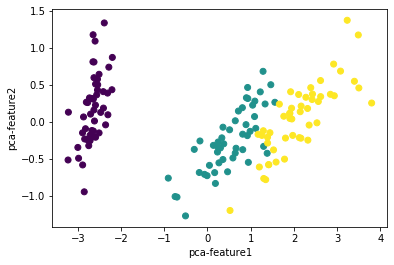

In [100]:
plt.scatter(t_samples[:,0], t_samples[:,1], c=labels)
plt.xlabel('pca-feature1')
plt.ylabel('pca-feature2')
plt.show()
# PCA keeps only 2 important features and as we can see these two features are sufficient to categorize species

In [101]:
# Lets do Kmeans clustering on these 2 PCA features of iris data set and compare them with KMeans results with 
# original features

In [102]:
def kMeans_clustering(samples, labels, species):
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(samples)
    ypredict = kmeans.predict(samples)
    df = pd.DataFrame({'labels': ypredict, 'species': species})
    ct = pd.crosstab(df['labels'], df['species'])
    score = kmeans.inertia_
    return ct, score

In [103]:
# For 2 pca features
ct2, score2 = kMeans_clustering(t_samples, labels, species)
print(ct2)
print(score2)

species  setosa  versicolor  virginica
labels                                
0             0          47         14
1            50           0          0
2             0           3         36
63.81994202200126


In [104]:
# Original 4 features
ct4, score4 = kMeans_clustering(samples, labels, species)
print(ct4)
print(score4)

species  setosa  versicolor  virginica
labels                                
0            50           0          0
1             0          48         14
2             0           2         36
78.85144142614601


In [105]:
# Results are pretty much similar for both clustering 

## PCA and Clustering on Wikipedia Data: `Pending` ??

In [106]:
wiki = None
for chunk in pd.read_csv("datasets/wikipedia_utf8_filtered_20pageviews.csv", chunksize=2000):
    wiki = chunk
    break

In [107]:
wiki.columns = ['link','articles']

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
tfidf = TfidfVectorizer(max_features=2000)

In [110]:
wiki_articles = wiki['articles'].values

In [109]:
len(wiki_articles)

2000

In [110]:
wiki_csr = tfidf.fit_transform(wiki_articles)

In [150]:
tfidf.get_feature_names()

['000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '150',
 '16',
 '17',
 '18',
 '19',
 '1945',
 '1950s',
 '1960s',
 '1962',
 '1964',
 '1967',
 '1968',
 '1969',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1977',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '19th',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '20th',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '2nd',
 '30',
 '300',
 '31',
 '35',
 '40',
 '45',
 '50',
 '500',
 '60',
 '70',
 '80',
 '90',
 'ability',
 'able',
 'about',
 'above',
 'academic',
 'academy',
 'accepted',
 'access',
 'according',
 'account',
 'accused',
 'achieved',
 'acquired',
 'across',
 'act',
 'acting',
 'action',
 'actions',
 'active',
 'activ

### Non-Negative Matrix Factorization
1. Dimension Reduction Technique
2. Only applied to dataset with *non-negative* sample features
3. NMF models are interpretable and easy to understand (unlike PCA)
    - It decomposes samples as sum of their part 
    - e.g we have N samples, then it compute say M parts from these samples 
    - N samples : Part1 , Part2, Part3, Part4, ... , PartM
    - Now each samples can be represented by weighted sum of these parts 
    - `sample1 = w1*Part1 + w2*Part2 + w3*Part3 + ... + wM*PartM` 
    - E.g: 
        - Text Documents are decomposed as combination of common themes: Part1, Part2,.. represent different themes
        - Images are decomposed as combination of common patterns.
    - Part1, Part2, Part3,.., these are NMF components 
    - w1, w2, w3,... these are NMF features
4. NMF components basically represent patterns that frequently occur in the samples.

 

#### Code
1. `from sklearn.decomposition import NMF`
2. `model = NMF(n_components=3)` : It is compulsary to mention the components 
3. It works for both Numpy array and CSR-matrix 
4. `model.fit(samples)`
5. `nmf_features = model.transform(samples)`: no of features = no. of components 
6. `model.components_`: Dimension of components = dimension of samples
7. Entries of *nmf features* and *components* are NON-Negative
8. Reconstruction of sample point from nmf-features
    - Multiply nmf features with corresponding nmf component and add them
    - This above method can be expressed as Product of Matrices, that's where Matrix Factorization name came from.
9. 

In [111]:
images_df = pd.read_csv("datasets/lcd-digits.csv")

In [112]:
images_df.shape


(99, 104)

In [113]:
images = images_df.values

In [125]:
images.shape

(99, 104)

In [135]:
three_digit = np.array([[0,0,0,0,0,0,0,0]
,[0,0,1,1,1,1,0,0]
,[0,0,0,0,0,0,1,0]
,[0,0,0,0,0,0,1,0]
,[0,0,0,0,0,0,1,0]
,[0,0,0,0,0,0,1,0]
,[0,0,1,1,1,1,0,0]
,[0,0,0,0,0,0,1,0]
,[0,0,0,0,0,0,1,0]
,[0,0,0,0,0,0,1,0]
,[0,0,0,0,0,0,1,0]
,[0,0,1,1,1,1,0,0]
,[0,0,0,0,0,0,0,0]])

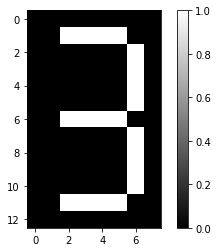

In [137]:
plt.imshow(three_digit, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [141]:
images = np.vstack((images, three_digit.reshape(1,-1)))

In [142]:
images.shape

(100, 104)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


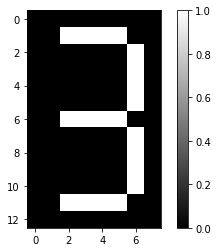

In [143]:
digit = images[99].reshape((13,8))
print(digit)
plt.imshow(digit, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

### Applying NMF to images data
1. NMF learns the frequently occuring pattern
2. Decompose each image into these patterns. 
3. Components represent these patterns.
4. NMF features are the weightage for each component
5. Examples 
    - Say 7 components: --> comp1 , comp2, ... comp7
    - Also #NMF features = 7: --> f1, f2, ... f7
    - Image(i)= `f1(i)*comp1 + f2(i)*comp2 + ... + f7(i)*comp7`

In [241]:
from sklearn.decomposition import NMF

In [275]:
model = NMF(n_components=7)
tsamples = model.fit_transform(images)
tsamples.shape

(100, 7)

In [276]:
model.components_.shape

(7, 104)

In [277]:
def show_image(sample):
    image = sample.reshape((13,8))
    plt.figure()
    plt.imshow(image, cmap="gray", interpolation='nearest')
    plt.colorbar()
    plt.show()

In [278]:
components = model.components_
components.shape

(7, 104)

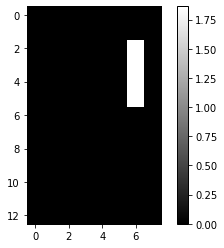

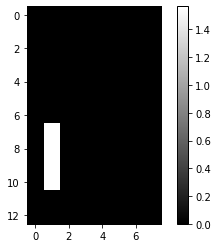

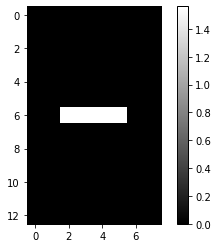

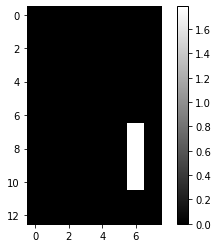

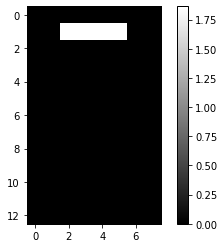

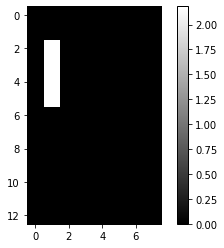

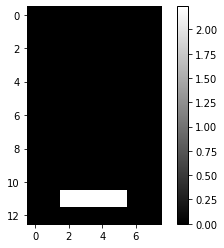

In [279]:
## All components are Frequent patterns of image.
for comp in components:
#     print(comp.shape)
    show_image(comp)

In [280]:
# these transformed samples are NMF features and basically act as weight while reconstructing images.
nmfFeature99 = tsamples[99]

In [282]:
nmfFeature99
# Weightage corresponding to each component for reconstructing
# Example 1st, 3rd, 4th,5th and 7th entry are significant numbers, which means corresponding components 
# are significant contributors in reconstructing the image.

array([0.53681343, 0.        , 0.64012864, 0.55968287, 0.53678241,
       0.        , 0.44704776])

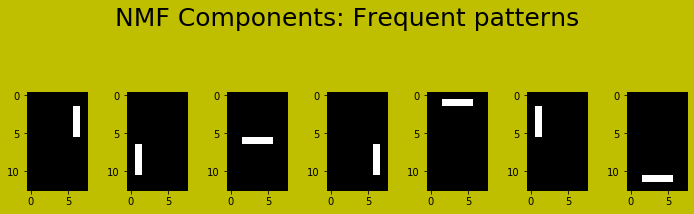

In [283]:
# VISUALIZING THE FREQUENT PATTERNS
fig = plt.figure(figsize=(10,4), edgecolor='b', facecolor='y') # facecolor: background color of figure
fig.suptitle("NMF Components: Frequent patterns", y=0.9, va='baseline', ha='center', fontsize=25 )
# suptitle: title of complete figure and different options to position the title text
# The upcoming image will have rows =1 and cols = 7 and at any position= (rowi,coli) we can place subplot
rows = 1
cols = 7
ax = []
for i in range(rows*cols):
    image = components[i].reshape((13,8))
    ax.append(fig.add_subplot(rows, cols, i+1)) # add subplot at the location 'i+1' in fig with size (rows,cols)
#     ax[-1].set_title("title of the subplots")
    plt.imshow(image, cmap="gray")

# to add padding between the subpots
fig.tight_layout(pad=2.0)
plt.show()

In [330]:
def add_sub_plot(fig_obj, rows, cols, pos, image, title):
    sub_plot_obj = fig_obj.add_subplot(rows,cols,pos)
    plt.imshow(image, cmap="gray", interpolation='nearest')
    sub_plot_obj.set_title(title, y=1.01,fontsize=16, c ='red')
    return sub_plot_obj

Features:  (7,)
Components:  (7, 104)
Reconstructed image shape:  (104,)


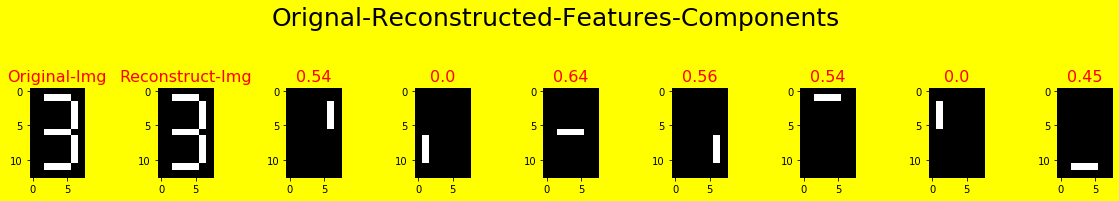

In [312]:
# Constructing image99 with nmf features and components
original = images[99]
original = original.reshape((13,8))

nmf_components = np.array(components)
nmf_features = np.array(nmfFeature99)
print("Features: ",nmf_features.shape)
print("Components: ", nmf_components.shape)

reconstructed = np.array(nmf_components)
for i in range(len(nmf_features)):
    reconstructed[i] = reconstructed[i]*nmf_features[i]
reconstructed = np.sum(reconstructed, axis=0)
print("Reconstructed image shape: ",reconstructed.shape)
reconstructed = reconstructed.reshape((13,8))



fig_obj = plt.figure(figsize=(16,5), facecolor='yellow')
fig_obj.suptitle("Orignal-Reconstructed-Features-Components", y= 0.85, fontsize=25)
rows = 1
cols = 9
sub_plot_list = []
sub_plot_obj = add_sub_plot(fig_obj, rows, cols, 1, original, "Original-Img")
sub_plot_list.append(sub_plot_obj)

sub_plot_obj = add_sub_plot(fig_obj, rows, cols, 2, reconstructed, "Reconstruct-Img")
sub_plot_list.append(sub_plot_obj)

for i in range(3, rows*cols + 1):
    tmp_comp = nmf_components[i-3]
    tmp_comp = tmp_comp.reshape((13,8))
    sub_plot_obj = add_sub_plot(fig_obj, rows, cols, i, tmp_comp, str(round(nmf_features[i-3],2)))
    sub_plot_list.append(sub_plot_obj)

fig_obj.tight_layout(pad=2.0)
plt.show()

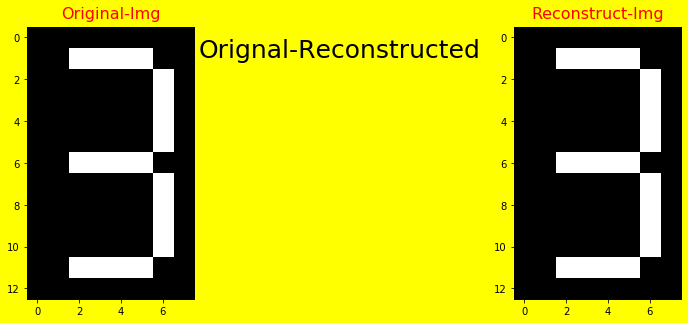

In [313]:
fig_obj = plt.figure(figsize=(16,5), facecolor='yellow')
fig_obj.suptitle("Orignal-Reconstructed", y= 0.85, fontsize=25)
rows = 1
cols = 2
sub_plot_list = []
sub_plot_obj = add_sub_plot(fig_obj, rows, cols, 1, original, "Original-Img")
sub_plot_list.append(sub_plot_obj)

sub_plot_obj = add_sub_plot(fig_obj, rows, cols, 2, reconstructed, "Reconstruct-Img")
sub_plot_list.append(sub_plot_obj)


### PCA is not interpretable or easy to explain 
1. Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images

In [316]:
pca_model = PCA(n_components=7)
pca_features = pca_model.fit_transform(images)

In [319]:
print(pca_features.shape)
pca_components = pca_model.components_
print(pca_components.shape)

(100, 7)
(7, 104)


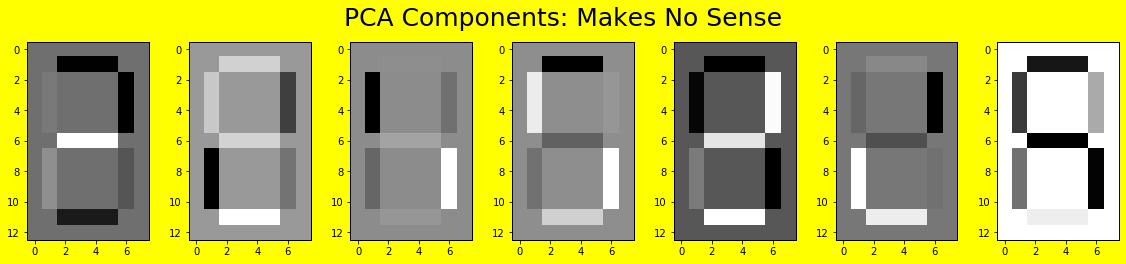

In [326]:
fig_pca = plt.figure(figsize=(16,4), edgecolor='b', facecolor='yellow')
fig_pca.suptitle("PCA Components: Makes No Sense", y=0.9, va='baseline', ha='center', fontsize=25 )
rows = 1
cols = 7
ax = []
for i in range(rows*cols):
    image = pca_components[i].reshape((13,8))
    ax.append(fig_pca.add_subplot(rows, cols, i+1)) 
    plt.imshow(image, cmap="gray")

fig_pca.tight_layout(pad=2.0)
plt.show()

In [339]:
def add_sub_plot2(fig_obj, rows, cols, pos, image, title):
    sub_plot_obj = fig_obj.add_subplot(rows,cols,pos)
    plt.imshow(image,  interpolation='nearest')
    sub_plot_obj.set_title(title, y=1.01,fontsize=16, c ='red')
    return sub_plot_obj

def reconstruct_from_pca(idx):
    fig_obj = plt.figure(figsize=(16,5), facecolor='yellow')
    fig_obj.suptitle("Orignal-Reconstructed", y= 0.85, fontsize=25)
    rows = 1
    cols = 2
    sub_plot_list = []
    original = images[idx].reshape((13,8))
    sub_plot_obj = add_sub_plot2(fig_obj, rows, cols, 1, original, "Original-Img")
    sub_plot_list.append(sub_plot_obj)

    reconstr_pca = np.array(pca_components)
    for i in range(len(pca_features[idx])):
        reconstr_pca[i] = reconstr_pca[i]*pca_features[99][i]
    reconstr_pca = np.sum(reconstr_pca, axis=0)
    reconstr_pca = reconstr_pca.reshape((13,8))
    
    sub_plot_obj = add_sub_plot2(fig_obj, rows, cols, 2, reconstr_pca, "Reconstruct-Img")
    sub_plot_list.append(sub_plot_obj)
    

### PCA Reconstruction is not same as NMF features
1. Reconstruction from PCA doesn't work same way as from NMF.
2. Here I try to reconstruct from PCA features same way as NMF, But the Results are wrong

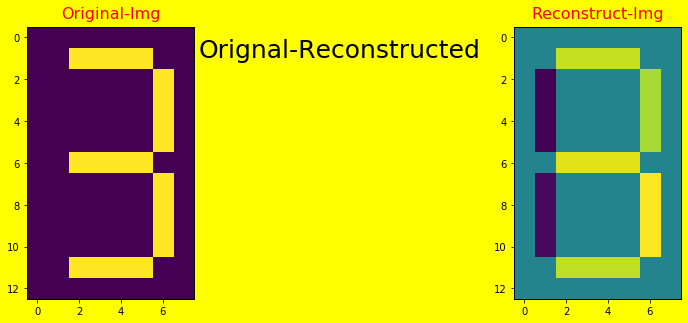

In [340]:
reconstruct_from_pca(99)

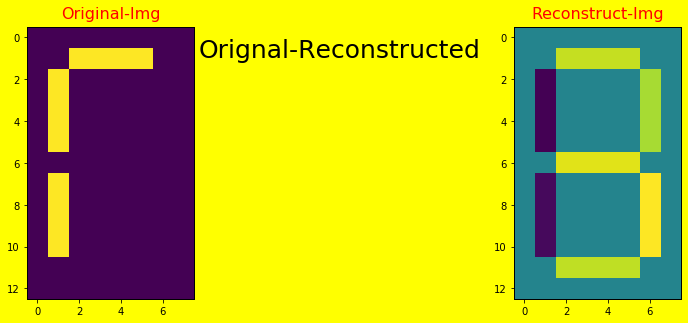

In [341]:
reconstruct_from_pca(98)

In [268]:
print(arr)
arr[0] = 2*arr[0]
print(arr)
print(np.sum(arr, axis=0))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[2 4 6]
 [4 5 6]
 [7 8 9]]
[13 17 21]


In [260]:
len(components)

7

In [ ]:
def show_image(sample):
    image = sample.reshape((13,8))
    plt.figure()
    plt.imshow(image, cmap="gray", interpolation='nearest')
    plt.colorbar()
    plt.show()

In [111]:
import wikipedia as api

In [114]:
api.search("Bollywood Actors")

['List of Bollywood actors',
 'Bollywood',
 'Imran Khan (Bollywood actor)',
 'List of Bollywood villain actors',
 'Aamir Khan',
 'Amitabh Bachchan',
 'List of Indian film actors',
 'Khans of Bollywood',
 'Raj Kiran (actor)',
 'List of Bhojpuri cinema actors']

In [121]:
actors_list = ["Aakshay Kumar", "Salman Khan", "Amitabh Bachchan", "Priyanka Chopra", "Katrina Kaif"]
politician_list = ["Narendra Modi", "Rahul Gandhi", "Amit Shah", "Smriti Irani", "Sonia Gandhi"]
sports_list = ["Virat Kohli", "Mary Kom", "Sachin Tendulkar", "Vijender Singh", "Saina Nehwal"]

In [130]:
celebs_list = \
["Akshay Kumar", "Salman Khan", "Amitabh Bachchan", "Priyanka Chopra", "Katrina Kaif","Narendra Modi", "Rahul Gandhi", "Amit Shah", "Smriti Irani", "Sonia Gandhi","Virat Kohli", "Katie Taylor", "Sachin Tendulkar", "Vijender Singh", "Saina Nehwal"]

In [131]:
len(celebs_list)
titles = []
articles = []
for celeb in celebs_list:
    titles.append(celeb)
    articles.append(api.summary(celeb))

In [134]:
wiki = pd.DataFrame({'title': titles, 'article': articles})

In [141]:
import re

In [138]:
for index, row in wiki.iterrows():
    sentence = row['article']
    sentence = sentence.lower()  # lower case 
    
    sentence = re.sub(r'[^a-zA-Z])
    print(sentence)

Rajiv Hari Om Bhatia (born 9 September 1967), known professionally as Akshay Kumar, is an actor, producer, martial artist and television personality who works in Bollywood films. In a career spanning over 29 years, Kumar has appeared in over 100 films and has won several awards, including the National Film Award for Best Actor for his performance in Rustom (2016), and two Filmfare Awards for Ajnabee (2001) and Garam Masala (2005).
Kumar is one of the most successful Bollywood actors of all time, having starred in 113 films, 52 of which were commercially successful..
He was the first Bollywood actor whose films' domestic net lifetime collections crossed ₹20 billion (US$280 million) by 2013, and ₹30 billion (US$420 million) by 2016. Having done so, he has established himself as one of the prominent actors of Hindi cinema. When he began his acting career in the 1990s, he primarily starred in action films. Later, Kumar also gained fame for his drama, romantic and comic roles.
Apart from ac

In [139]:
sent = "Manish"
sent.lower()

'manish'

In [158]:
re.sub(r'[^a-zA-Z\s]', 'W', "Manish Rathi $23 hel9")

'Manish Rathi WWW helW'